In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA, PCA
from matplotlib.pyplot import cm

In [2]:
np.random.seed(50)  # set the seed to reproduce the experiment

In [3]:
N = 10000  # number opf samples
N_signals = 4
time = np.linspace(0, 10, N)  # generate the time axis (seconds)
time.resize(1, N)
freq1 = 0.5  # main frequency (Hz)
freq2 = freq1 * np.sqrt(2)
freq3 = freq1 * np.sqrt(5)
x1 = np.sin(2 * np.pi * freq1 * time - np.pi / 4)  # Signal 1: sinusoidal signal
x2 = np.sign(np.sin(2 * np.pi * freq2 * time - np.pi / 5))  # Signal 2: square wave
x3 = signal.sawtooth(2 * np.pi * freq3 * time)  # Signal 3: saw tooth signal
x4 = np.cumsum(x2)
x4 = (x4 - x4.mean()) / x4.std()
x4 = x4 / x4.max()
x4.resize(1, N)  # signal 2: triangular signal

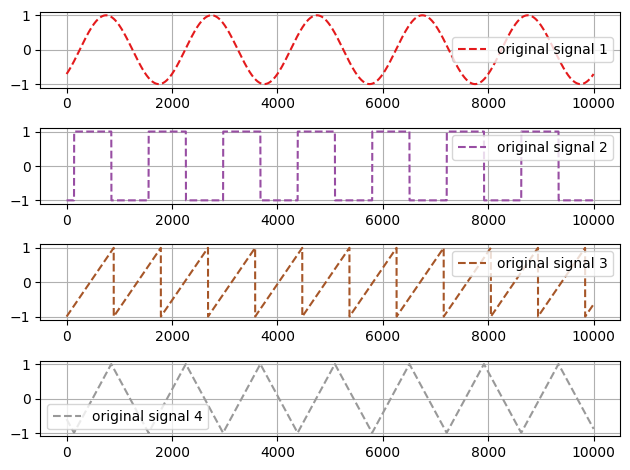

In [5]:
X = np.concatenate((x1,x2,x3,x4),axis=0) # shape: 3 rows N columns
color = iter(cm.Set1(np.linspace(0, 1,N_signals)))
plt.figure()
for n in range(N_signals):
    c = next(color)
    plt.subplot(N_signals,1,1+n)
    plt.plot(X[n,:],'--',color=c,label='original signal '+str(n+1))
    plt.grid()
    plt.legend()
plt.tight_layout()
plt.show()

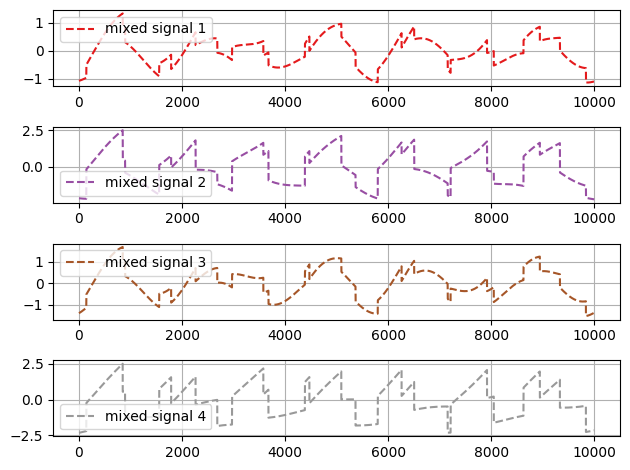

In [6]:
A = np.random.rand(N_signals, N_signals)  # true weight matrix (random)
Y = np.dot(A, X)  # observed data, shape: 3 rows N columns
W = np.linalg.inv(A)
color = iter(cm.Set1(np.linspace(0, 1, N_signals)))
plt.figure()
for n in range(N_signals):
    c = next(color)
    plt.subplot(N_signals, 1, 1 + n)
    plt.plot(Y[n, :], '--', color=c, label='mixed signal ' + str(n + 1))
    plt.grid()
    plt.legend()
plt.tight_layout()
plt.show()

In [7]:
X = X.T  #shape: N rows, 3 columns 
Y = Y.T  #shape: N rows, 3 columns 

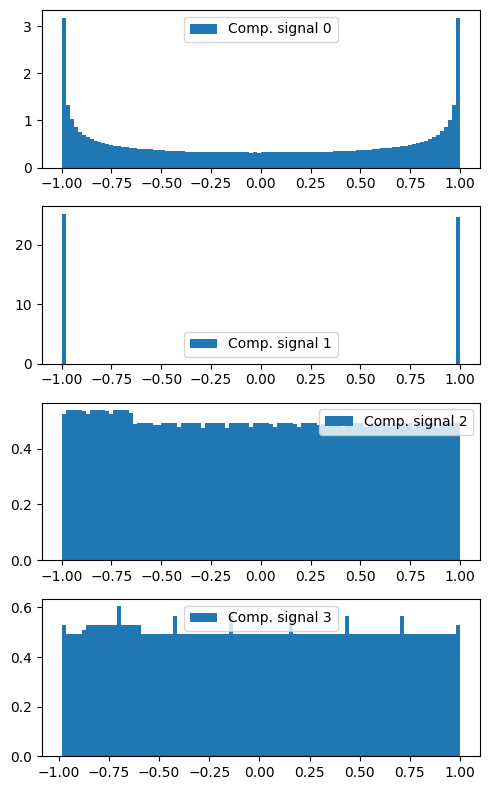

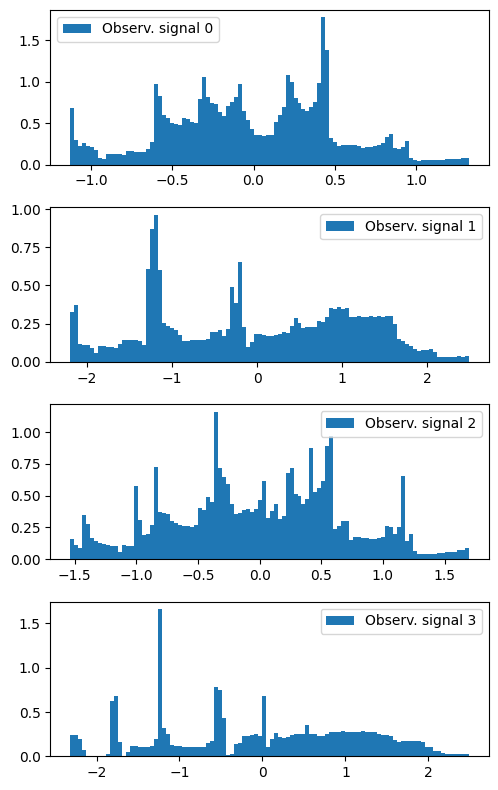

In [8]:
plt.figure(figsize=(5, 8))
for n in range(N_signals):
    plt.subplot(N_signals, 1, 1 + n)
    plt.hist(X[:, n], bins=100, density=True, label='Comp. signal ' + str(n))
    plt.legend()
# plt.xlabel('sample values')
# plt.ylabel('pdf')
plt.tight_layout()
plt.figure(figsize=(5, 8))
for n in range(N_signals):
    plt.subplot(N_signals, 1, 1 + n)
    plt.hist(Y[:, n], bins=100, density=True, label='Observ. signal ' + str(n))
    plt.legend()
plt.tight_layout()
plt.show()

In [9]:
ica = FastICA(n_components=N_signals, algorithm="deflation", whiten="unit-variance")
XhatICA = ica.fit_transform(Y)  # Reconstruct indep signals from obervations
Ahat = ica.mixing_  # estimated A
What = ica.components_  # estimated matrix W: Xhat=np.dot(Y,ica.components_.T)

In [10]:
vm1=W.min()
VM1=W.max()
vm2=What.min()
VM2=What.max()
vm=np.min([vm1,vm2])
VM=np.max([VM1,VM2])

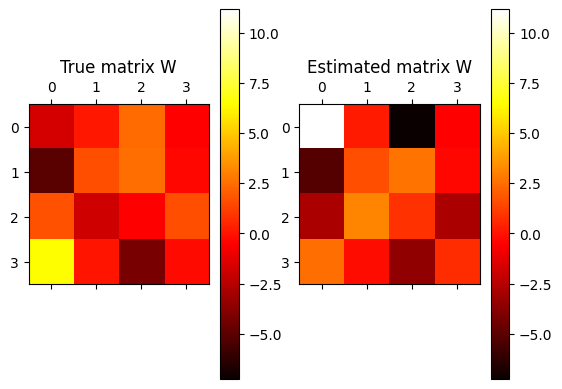

In [11]:
plt.figure()
plt.subplot(1,2,1)
plt.matshow(W,0,vmin=vm,vmax=VM, cmap='hot')
plt.colorbar()
plt.title('True matrix W')
plt.subplot(1,2,2)
plt.matshow(What,0,vmin=vm,vmax=VM, cmap='hot')
plt.colorbar()
plt.title('Estimated matrix W')
plt.show()

In [12]:
pca = PCA(n_components=N_signals)
XhatPCA = pca.fit_transform(Y)  # Reconstruct signals based on orthogonal components

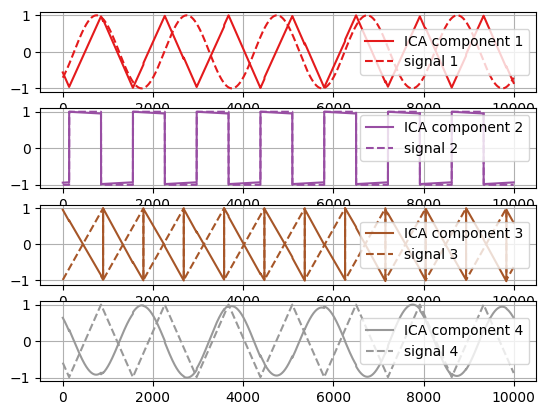

In [14]:
color = iter(cm.Set1(np.linspace(0, 1, N_signals)))
plt.figure()
for n in range(N_signals):
    c = next(color)
    plt.subplot(N_signals, 1, 1 + n)
    plt.plot(XhatICA[:, n] / np.max(XhatICA[:, n]), '-', color=c, label='ICA component ' + str(n + 1))
    plt.plot(X[:, n] / np.max(X[:, n]), '--', color=c, label='signal ' + str(n + 1))
    plt.grid()
    plt.legend()
color = iter(cm.Set1(np.linspace(0, 1, N_signals)))
plt.show()

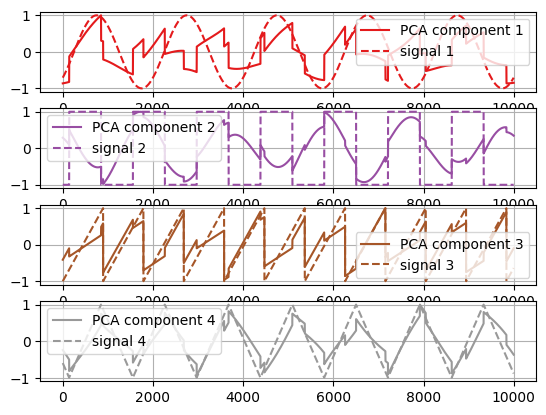

In [15]:

plt.figure()
for n in range(N_signals):
    c = next(color)
    plt.subplot(N_signals, 1, 1 + n)
    plt.plot(XhatPCA[:, n] / np.max(XhatPCA[:, n]), '-', color=c, label='PCA component ' + str(n + 1))
    plt.plot(X[:, n] / np.max(X[:, n]), '--', color=c, label='signal ' + str(n + 1))
    plt.grid()
    plt.legend()
plt.show()